## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:



# Project Title

## Overview

## Business Problem

## Data Understanding

We need to find outcomes to solve our business problem:
- tn.movie_budgets.csv.gz contains `production_budget`, `domestic_gross`, `worldwide_gross`
- im.db has `movie_ratings` table with `averagerating` and `numvotes`

We also need features that might relate to our outcomes:
- im.db has movie names, genres, and names of actors and directors
- bom.movie_gross.csv.gz contains the studio that produced each movie

In [126]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# print big numbers in pd.DataFrame (instead of scientific notation)
pd.set_option('display.precision', 12)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Set matplotlib title font size
plt.rcParams['axes.titlesize'] = 18

### Getting financial info from tn.movie_budgets.csv.gz
- Contains `production_budget`, `domestic_gross`, `worldwide_gross` formatted as string with special characters (e.g., $425,000,000)

In [2]:
tn_movie_budgets_df = pd.read_csv('../zippedData/tn.movie_budgets.csv.gz')

print(tn_movie_budgets_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB
None


In [3]:
print(tn_movie_budgets_df.head())
print(tn_movie_budgets_df.tail())

   id  release_date                                        movie  \
0   1  Dec 18, 2009                                       Avatar   
1   2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2   3   Jun 7, 2019                                 Dark Phoenix   
3   4   May 1, 2015                      Avengers: Age of Ultron   
4   5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   

  production_budget domestic_gross worldwide_gross  
0      $425,000,000   $760,507,625  $2,776,345,279  
1      $410,600,000   $241,063,875  $1,045,663,875  
2      $350,000,000    $42,762,350    $149,762,350  
3      $330,600,000   $459,005,868  $1,403,013,963  
4      $317,000,000   $620,181,382  $1,316,721,747  
      id  release_date                          movie production_budget  \
5777  78  Dec 31, 2018                         Red 11            $7,000   
5778  79   Apr 2, 1999                      Following            $6,000   
5779  80  Jul 13, 2005  Return to the Land of Wo

### Get studios and additional financial info from bom.movie_gross.csv.gz
- Contains `domestic_gross` and `foreign_gross`
- `foreign_gross` is formatted as string with special characters (e.g., 425,000,000)

In [4]:
bom_df = pd.read_csv('../zippedData/bom.movie_gross.csv.gz')
print(bom_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
None


In [5]:
print(bom_df.head())
print(bom_df.tail())

                                         title studio  domestic_gross  \
0                                  Toy Story 3     BV    415000000.00   
1                   Alice in Wonderland (2010)     BV    334200000.00   
2  Harry Potter and the Deathly Hallows Part 1     WB    296000000.00   
3                                    Inception     WB    292600000.00   
4                          Shrek Forever After   P/DW    238700000.00   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010  
                            title      studio  domestic_gross foreign_gross  \
3382                    The Quake       Magn.         6200.00           NaN   
3383  Edward II (2018 re-release)          FM         4800.00           NaN   
3384                     El Pacto        Sony         2500.00           NaN   
3385                     The Swan  Synergetic         2400.00           NaN   
3386            An Act

### Getting information about tables and columns in im.db


In [6]:
# Create the connect to im.db database
con = sqlite3.connect('../zippedData/im.db')

In [7]:
# Get info about tables and columns
im_schema_df = pd.read_sql("""

SELECT *
FROM sqlite_master

""", con)

In [8]:
im_schema_df

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [9]:
# Let's see column names and types in sql for each table
for idx in im_schema_df.index:
    print(im_schema_df.iloc[idx]['name'], im_schema_df.iloc[idx]['sql'])

movie_basics CREATE TABLE "movie_basics" (
"movie_id" TEXT,
  "primary_title" TEXT,
  "original_title" TEXT,
  "start_year" INTEGER,
  "runtime_minutes" REAL,
  "genres" TEXT
)
directors CREATE TABLE "directors" (
"movie_id" TEXT,
  "person_id" TEXT
)
known_for CREATE TABLE "known_for" (
"person_id" TEXT,
  "movie_id" TEXT
)
movie_akas CREATE TABLE "movie_akas" (
"movie_id" TEXT,
  "ordering" INTEGER,
  "title" TEXT,
  "region" TEXT,
  "language" TEXT,
  "types" TEXT,
  "attributes" TEXT,
  "is_original_title" REAL
)
movie_ratings CREATE TABLE "movie_ratings" (
"movie_id" TEXT,
  "averagerating" REAL,
  "numvotes" INTEGER
)
persons CREATE TABLE "persons" (
"person_id" TEXT,
  "primary_name" TEXT,
  "birth_year" REAL,
  "death_year" REAL,
  "primary_profession" TEXT
)
principals CREATE TABLE "principals" (
"movie_id" TEXT,
  "ordering" INTEGER,
  "person_id" TEXT,
  "category" TEXT,
  "job" TEXT,
  "characters" TEXT
)
writers CREATE TABLE "writers" (
"movie_id" TEXT,
  "person_id" TEXT


#### Use SQL to get info about `movie_basics` and `movie_ratings`
- `movie_ratings`
    - `averagerating` and `numvotes` are columns of imdb ratings
- `movie_basics` table
    - `genres` is a string that contains multiple genres (separated by commas)
    - `primary_title` has duplicate rows with same value

#### movie_ratings table

In [10]:
# What do sample values look like?
pd.read_sql("""
SELECT
    *
FROM
    movie_ratings
LIMIT 5
""", con)

,movie_id,averagerating,numvotes
0,tt10356526,8.30,31
1,tt10384606,8.90,559
2,tt1042974,6.40,20
3,tt1043726,4.20,50352
4,tt1060240,6.50,21


In [11]:
# How many records exist? What are the MIN() and MAX() values
pd.read_sql("""
SELECT
    COUNT(*) AS movie_ratings_rows,
    MIN(averagerating) AS min_averagerating,
    MAX(averagerating) AS max_averagerating,
    MIN(numvotes) AS min_numvotes,
    MAX(numvotes) AS max_numvotes
FROM
    movie_ratings
""", con)

,movie_ratings_rows,min_averagerating,max_averagerating,min_numvotes,max_numvotes
0,73856,1.00,10.00,5,1841066


#### movie_basics table

In [12]:
# What do sample values look like?
pd.read_sql("""
SELECT
    *
FROM
    movie_basics
LIMIT 5
""", con)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy"


In [13]:
# How many records exist? What are the MIN() and MAX() values
pd.read_sql("""
SELECT
    COUNT(*) as movie_basics_rows,
    MIN(runtime_minutes) AS min_runtime_minutes,
    MAX(runtime_minutes) AS max_runtime_minutes,
    MIN(start_year) AS min_start_year,
    MAX(start_year) AS max_start_year
FROM
    movie_basics
""", con)

,movie_basics_rows,min_runtime_minutes,max_runtime_minutes,min_start_year,max_start_year
0,146144,1.00,51420.00,2010,2115


#### Use SQL to get info about   `persons` and `principals`

#### persons table

In [14]:
# What do sample values look like?
pd.read_sql("""
SELECT
    *
FROM
    persons
LIMIT 5
""", con)

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,None,None,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,None,None,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,None,None,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,None,None,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,None,None,"production_designer,art_department,set_decorator"


In [15]:
pd.read_sql("""
SELECT
    COUNT(*)
FROM
    persons
""", con)

,COUNT(*)
0,606648


#### principals table

In [16]:
# What do sample values look like?
pd.read_sql("""
SELECT
    *
FROM
    principals
LIMIT 5
""", con)

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"


In [17]:
# How many records exist?
pd.read_sql("""
SELECT
    COUNT(*) as principals_rows
FROM
    principals
""", con)

,principals_rows
0,1028186


## Data Preparation

### Extract data from sqlite3 im.db into convenient pd.DataFrame(s)

#### Let's JOIN im.db `movie_basics`  and `movie_ratings`
- read into `imdb_ratings_df` DataFrame

In [18]:
### Look into who the primary directors are
imdb_ratings_df = pd.read_sql("""

SELECT
    b.movie_id, b.primary_title, b.original_title, b.start_year, b.runtime_minutes, b.genres,
    r.averagerating, r.numvotes
FROM
    -- Use LEFT JOIN to keep all movies, even if they have no ratings
    movie_basics as b
    LEFT JOIN movie_ratings as r
        USING(movie_id)

""", con)
imdb_ratings_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama",7.00,77.00
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama",7.20,43.00
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama,6.90,4517.00
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,"Comedy,Drama",6.10,13.00
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy",6.50,119.00
...,...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.00,Drama,nan,nan
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,nan,Documentary,nan,nan
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,nan,Comedy,nan,nan
146142,tt9916730,6 Gunn,6 Gunn,2017,116.00,None,nan,nan


#### Count non-null rows in imdb_ratings_df
- in part, ran this to check that 
    - movie_basics returned 146144 rows, and 
    - movie_ratings returned 73856 rows
- There are some missing data in runtime_minutes and genres

In [19]:
imdb_ratings_df.notna().sum()

movie_id           146144
primary_title      146144
original_title     146123
start_year         146144
runtime_minutes    114405
genres             140736
averagerating       73856
numvotes            73856
dtype: int64

#### Let's get im.db `persons`  and `principals`
- Read into `imdb_principals_df` DataFrame
- I'm keeping info about principals separate, because relationship of `movie_id` to `person_id` is one-to-many 
    - (i.e., a `person_id` can have multiple roles in one `movie_id`)
    - There are multiple directors for some movies, and we will need to figure out how to deal with that when determining which directors are best
- Still want to merge `imdb_principals_df` with `imdb_ratings_df` to put movie info with principals

In [20]:
imdb_principals_df = pd.read_sql("""

SELECT
    *
FROM
    -- Use LEFT JOIN to keep all principals, even if they have no persons info
    principals
    LEFT JOIN persons
        USING(person_id)

""", con)
imdb_principals_df

,movie_id,ordering,person_id,category,job,characters,primary_name,birth_year,death_year,primary_profession
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]",Tommy Dysart,nan,nan,actor
1,tt0111414,2,nm0398271,director,None,None,Frank Howson,1952.00,nan,"actor,writer,producer"
2,tt0111414,3,nm3739909,producer,producer,None,Barry Porter-Robinson,nan,nan,"producer,art_department"
3,tt0323808,10,nm0059247,editor,None,None,Sean Barton,1944.00,nan,"editor,editorial_department,assistant_director"
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]",Brittania Nicol,nan,nan,"actress,soundtrack"
...,...,...,...,...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,None,"[""Ebenezer Scrooge""]",Kenneth Cranham,1944.00,nan,"actor,soundtrack"
1028182,tt9692684,2,nm4929530,self,None,"[""Herself"",""Regan""]",Pearl Mackie,1987.00,nan,actress
1028183,tt9692684,3,nm10441594,director,None,None,Guy Jones,nan,nan,director
1028184,tt9692684,4,nm6009913,writer,writer,None,Sabrina Mahfouz,nan,nan,writer


In [21]:
# Merge imdb_ratings_df with imdb_principals_df
# left join in order to keep all principals
imdb_principals_df = imdb_principals_df.merge(imdb_ratings_df, on='movie_id', how='left')
imdb_principals_df

,movie_id,ordering,person_id,category,job,characters,primary_name,birth_year,death_year,primary_profession,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]",Tommy Dysart,nan,nan,actor,A Thin Life,A Thin Life,2018,75.00,Comedy,nan,nan
1,tt0111414,2,nm0398271,director,None,None,Frank Howson,1952.00,nan,"actor,writer,producer",A Thin Life,A Thin Life,2018,75.00,Comedy,nan,nan
2,tt0111414,3,nm3739909,producer,producer,None,Barry Porter-Robinson,nan,nan,"producer,art_department",A Thin Life,A Thin Life,2018,75.00,Comedy,nan,nan
3,tt0323808,10,nm0059247,editor,None,None,Sean Barton,1944.00,nan,"editor,editorial_department,assistant_director",The Wicker Tree,The Wicker Tree,2011,96.00,"Drama,Horror",3.90,2328.00
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]",Brittania Nicol,nan,nan,"actress,soundtrack",The Wicker Tree,The Wicker Tree,2011,96.00,"Drama,Horror",3.90,2328.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,None,"[""Ebenezer Scrooge""]",Kenneth Cranham,1944.00,nan,"actor,soundtrack",Disnatured,Disnatured,2016,nan,"Drama,Fantasy,Horror",nan,nan
1028182,tt9692684,2,nm4929530,self,None,"[""Herself"",""Regan""]",Pearl Mackie,1987.00,nan,actress,Disnatured,Disnatured,2016,nan,"Drama,Fantasy,Horror",nan,nan
1028183,tt9692684,3,nm10441594,director,None,None,Guy Jones,nan,nan,director,Disnatured,Disnatured,2016,nan,"Drama,Fantasy,Horror",nan,nan
1028184,tt9692684,4,nm6009913,writer,writer,None,Sabrina Mahfouz,nan,nan,writer,Disnatured,Disnatured,2016,nan,"Drama,Fantasy,Horror",nan,nan


### Data Cleaning

#### Let's make some helper functions
- Something to convert $123,456,789.00 to float


In [22]:
def convert_money_string(money_series):
    '''
    This function takes a pd.Series with string values representing money (USD) and converts that string to float
    '''
    return money_series.str.replace('$','').str.replace(',','').astype(float)

#### Now convert those money strings to floats
Earlier, we noticed that there were several financial columns that are strings rather than numbers 
- tn_movie_budgets_df: ['production_budget', 'domestic_gross', 'worldwide_gross']
- bom_df: ['foreign_gross']

In [23]:
for col in ['production_budget', 'domestic_gross', 'worldwide_gross']:
    tn_movie_budgets_df[col] = convert_money_string(tn_movie_budgets_df[col])
    col_mil = f"{col}_mil"
    tn_movie_budgets_df[col_mil] = tn_movie_budgets_df[col] / 1000000

In [24]:
for col in ['foreign_gross']:
    bom_df[col] = convert_money_string(bom_df[col])
    col_mil = f"{col}_mil"
    bom_df[col_mil] = bom_df[col] / 1000000

### Feature Engineering
- tn_movie_budgets_df: create `net_profit` and `roi` columns
- bom_df: create 'worldwide_gross'

In [25]:
tn_movie_budgets_df['worldwide_profit_mil'] = tn_movie_budgets_df['worldwide_gross_mil'] - tn_movie_budgets_df['production_budget_mil']
tn_movie_budgets_df['ROI'] = tn_movie_budgets_df['worldwide_profit_mil'] / tn_movie_budgets_df['production_budget_mil']
tn_movie_budgets_df[['worldwide_profit_mil', 'ROI']].describe()

,worldwide_profit_mil,ROI
count,5782.00,5782.00
mean,59.90,3.80
std,146.09,29.53
min,-200.24,-1.00
25%,-2.19,-0.51
50%,8.55,0.71
75%,60.97,2.76
max,2351.35,1799.00


#### Add useful columns to bom_df data
- convert domestic_gross dollars to millions
- add bom_worldwide_gross_mil

In [26]:
bom_df['domestic_gross_mil'] = bom_df['domestic_gross'] / 1000000
bom_df['bom_worldwide_gross_mil'] = bom_df['domestic_gross_mil'] + bom_df['foreign_gross_mil']

- replace NaNs with 0 (assuming that movie didn't gross any money in that region)

In [27]:
# If gross values are empty, assume it is because movie wasn't sold in that region
bom_df['foreign_gross'].fillna(0, inplace=True)
bom_df['domestic_gross'].fillna(0, inplace=True)
bom_df['foreign_gross_mil'].fillna(0, inplace=True)
bom_df['domestic_gross_mil'].fillna(0, inplace=True)
bom_df['bom_worldwide_gross_mil'].fillna(0, inplace=True)

#### Add a popularity column to imdb_ratings
- averagerating * numvotes

In [28]:
imdb_ratings_df['popularity'] = imdb_ratings_df['averagerating'] * imdb_ratings_df['numvotes']

## Filter data to those movies that Microsoft Studios might produce
- Assume that Microsoft wants to compete with more productive movie studios
- Assume that Microsoft is not interested in producing "art house" movies that are not popular or profitable
- Assume that Microsoft wants to produce popular movies (with large following and high ratings)

In [29]:
bom_studio_gross = bom_df.groupby('studio')['bom_worldwide_gross_mil'].sum()
bom_studio_gross.describe()

count     257.00
mean      959.07
std      4715.92
min         0.00
25%         0.00
50%         3.44
75%        54.62
max     44190.38
Name: bom_worldwide_gross_mil, dtype: float64

In [30]:
# Let's look at studios above 90th percentile in gross sales
gross_sales_90 = np.percentile(bom_studio_gross, 90)
filt = bom_studio_gross > gross_sales_90
competing_studios = bom_studio_gross[filt].index
competing_studios

Index(['BV', 'CJ', 'CL', 'FD', 'Focus', 'Fox', 'FoxS', 'HC', 'LG/S', 'LGF',
       'ORF', 'P/DW', 'Par.', 'Rela.', 'SGem', 'SPC', 'STX', 'Sony', 'Sum.',
       'TriS', 'Uni.', 'W/Dim.', 'WB', 'WB (NL)', 'WGUSA', 'Wein.'],
      dtype='object', name='studio')

In [31]:
filt = bom_df['studio'].isin(competing_studios)
bom_competing_studios_df = bom_df[filt]
print(f"Number of movies made by top 10% grossing studios: {bom_competing_studios_df.shape[0]}")
bom_competing_studios_df.groupby('studio')['bom_worldwide_gross_mil'].sum().sort_values(ascending=False)

Number of movies made by top 10% grossing studios: 1652


studio
BV        44190.38
Fox       30980.37
WB        30791.50
Uni.      29746.81
Sony      22404.72
Par.      19444.20
WB (NL)   10314.10
LGF        8467.47
LG/S       5318.92
P/DW       5076.50
Wein.      4095.90
SGem       3140.16
WGUSA      2778.05
Focus      2496.77
FoxS       2474.69
Sum.       2284.97
CL         1898.69
Rela.      1715.42
TriS       1713.06
STX        1474.20
SPC        1287.56
ORF        1192.53
HC          870.30
W/Dim.      757.33
FD          667.50
CJ          637.42
Name: bom_worldwide_gross_mil, dtype: float64

### Let's get movie and budget info for movies made by the top grossing "competing" studios
- Merge bom_competing_studios_df with tn_movie_budgets_df

In [32]:
print(bom_competing_studios_df.columns)
print(tn_movie_budgets_df.columns)
print(imdb_ratings_df.columns)

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year',
       'foreign_gross_mil', 'domestic_gross_mil', 'bom_worldwide_gross_mil'],
      dtype='object')
Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'production_budget_mil', 'domestic_gross_mil',
       'worldwide_gross_mil', 'worldwide_profit_mil', 'ROI'],
      dtype='object')
Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes', 'popularity'],
      dtype='object')


In [33]:
# We get multiple rows when we merge tn_movie_budgets_df
# So add 'year' to use as additional key
tn_movie_budgets_df['year'] = tn_movie_budgets_df['release_date'].str[-4:].astype(int)
tn_movie_budgets_df['year'].describe()

count   5782.00
mean    2003.97
std       12.72
min     1915.00
25%     2000.00
50%     2007.00
75%     2012.00
max     2020.00
Name: year, dtype: float64

In [34]:
competing_studio_budgets_df = bom_competing_studios_df.merge(tn_movie_budgets_df, left_on=['title', 'year'], right_on=['movie', 'year'], how='inner', suffixes=('_bom', '_tn'))
competing_studio_budgets_df

,title,studio,domestic_gross_bom,foreign_gross,year,foreign_gross_mil,domestic_gross_mil_bom,bom_worldwide_gross_mil,id,release_date,movie,production_budget,domestic_gross_tn,worldwide_gross,production_budget_mil,domestic_gross_mil_tn,worldwide_gross_mil,worldwide_profit_mil,ROI
0,Toy Story 3,BV,415000000.00,652000000.00,2010,652.00,415.00,1067.00,47,"Jun 18, 2010",Toy Story 3,200000000.00,415004880.00,1068879522.00,200.00,415.00,1068.88,868.88,4.34
1,Inception,WB,292600000.00,535700000.00,2010,535.70,292.60,828.30,38,"Jul 16, 2010",Inception,160000000.00,292576195.00,835524642.00,160.00,292.58,835.52,675.52,4.22
2,Shrek Forever After,P/DW,238700000.00,513900000.00,2010,513.90,238.70,752.60,27,"May 21, 2010",Shrek Forever After,165000000.00,238736787.00,756244673.00,165.00,238.74,756.24,591.24,3.58
3,The Twilight Saga: Eclipse,Sum.,300500000.00,398000000.00,2010,398.00,300.50,698.50,53,"Jun 30, 2010",The Twilight Saga: Eclipse,68000000.00,300531751.00,706102828.00,68.00,300.53,706.10,638.10,9.38
4,Iron Man 2,Par.,312400000.00,311500000.00,2010,311.50,312.40,623.90,15,"May 7, 2010",Iron Man 2,170000000.00,312433331.00,621156389.00,170.00,312.43,621.16,451.16,2.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,Superfly,Sony,20500000.00,236000.00,2018,0.24,20.50,20.74,49,"Jun 13, 2018",Superfly,16000000.00,20537137.00,20723581.00,16.00,20.54,20.72,4.72,0.30
973,Hell Fest,LGF,11100000.00,7100000.00,2018,7.10,11.10,18.20,20,"Sep 28, 2018",Hell Fest,5500000.00,11107431.00,18119231.00,5.50,11.11,18.12,12.62,2.29
974,Welcome to Marwen,Uni.,10800000.00,2100000.00,2018,2.10,10.80,12.90,18,"Dec 21, 2018",Welcome to Marwen,45000000.00,10763520.00,12874922.00,45.00,10.76,12.87,-32.13,-0.71
975,Kin,LGF,5700000.00,4300000.00,2018,4.30,5.70,10.00,88,"Aug 31, 2018",Kin,30000000.00,5718096.00,10096821.00,30.00,5.72,10.10,-19.90,-0.66


In [35]:
competing_studio_budgets_ratings_df = competing_studio_budgets_df.merge(imdb_ratings_df, left_on=['title', 'year'], right_on=['primary_title', 'start_year'], how='inner')
competing_studio_budgets_ratings_df

,title,studio,domestic_gross_bom,foreign_gross,year,foreign_gross_mil,domestic_gross_mil_bom,bom_worldwide_gross_mil,id,release_date,...,ROI,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,popularity
0,Toy Story 3,BV,415000000.00,652000000.00,2010,652.00,415.00,1067.00,47,"Jun 18, 2010",...,4.34,tt0435761,Toy Story 3,Toy Story 3,2010,103.00,"Adventure,Animation,Comedy",8.30,682218.00,5662409.40
1,Inception,WB,292600000.00,535700000.00,2010,535.70,292.60,828.30,38,"Jul 16, 2010",...,4.22,tt1375666,Inception,Inception,2010,148.00,"Action,Adventure,Sci-Fi",8.80,1841066.00,16201380.80
2,Shrek Forever After,P/DW,238700000.00,513900000.00,2010,513.90,238.70,752.60,27,"May 21, 2010",...,3.58,tt0892791,Shrek Forever After,Shrek Forever After,2010,93.00,"Adventure,Animation,Comedy",6.30,167532.00,1055451.60
3,The Twilight Saga: Eclipse,Sum.,300500000.00,398000000.00,2010,398.00,300.50,698.50,53,"Jun 30, 2010",...,9.38,tt1325004,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010,124.00,"Adventure,Drama,Fantasy",5.00,211733.00,1058665.00
4,Iron Man 2,Par.,312400000.00,311500000.00,2010,311.50,312.40,623.90,15,"May 7, 2010",...,2.65,tt1228705,Iron Man 2,Iron Man 2,2010,124.00,"Action,Adventure,Sci-Fi",7.00,657690.00,4603830.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,Proud Mary,SGem,20900000.00,876000.00,2018,0.88,20.90,21.78,50,"Jan 12, 2018",...,-0.28,tt6421110,Proud Mary,Proud Mary,2018,89.00,"Action,Crime,Drama",4.90,6805.00,33344.50
894,Hell Fest,LGF,11100000.00,7100000.00,2018,7.10,11.10,18.20,20,"Sep 28, 2018",...,2.29,tt1999890,Hell Fest,Hell Fest,2018,89.00,Horror,5.50,8662.00,47641.00
895,Welcome to Marwen,Uni.,10800000.00,2100000.00,2018,2.10,10.80,12.90,18,"Dec 21, 2018",...,-0.71,tt3289724,Welcome to Marwen,Welcome to Marwen,2018,116.00,"Biography,Comedy,Drama",6.10,8920.00,54412.00
896,Kin,LGF,5700000.00,4300000.00,2018,4.30,5.70,10.00,88,"Aug 31, 2018",...,-0.66,tt6017942,Kin,Kin,2018,102.00,"Action,Drama,Sci-Fi",5.70,9048.00,51573.60


In [36]:
competing_studio_budgets_ratings_df.columns

Index(['title', 'studio', 'domestic_gross_bom', 'foreign_gross', 'year',
       'foreign_gross_mil', 'domestic_gross_mil_bom',
       'bom_worldwide_gross_mil', 'id', 'release_date', 'movie',
       'production_budget', 'domestic_gross_tn', 'worldwide_gross',
       'production_budget_mil', 'domestic_gross_mil_tn', 'worldwide_gross_mil',
       'worldwide_profit_mil', 'ROI', 'movie_id', 'primary_title',
       'original_title', 'start_year', 'runtime_minutes', 'genres',
       'averagerating', 'numvotes', 'popularity'],
      dtype='object')

#### There are some duplicates still (same primary_title and year, but different ratings)
- Don't know how to handle these yet.
- Might loop over duplicate titles, find row with lowest 'numvotes', drop that row

In [37]:
dups = competing_studio_budgets_ratings_df['primary_title'].value_counts()
filt = dups > 1
dups[filt]

A Better Life        2
The Call             2
Sisters              2
The Night Before     2
Truth or Dare        2
Coco                 2
Cyrus                2
Leap Year            2
Abduction            2
The Artist           2
The Forest           2
Lights Out           2
Homefront            2
Burlesque            2
Spotlight            2
The Bounty Hunter    2
Big Eyes             2
The Walk             2
Addicted             2
Name: primary_title, dtype: int64

In [38]:
filt = (competing_studio_budgets_ratings_df['primary_title'] == 'Spotlight')
competing_studio_budgets_ratings_df[filt]

,title,studio,domestic_gross_bom,foreign_gross,year,foreign_gross_mil,domestic_gross_mil_bom,bom_worldwide_gross_mil,id,release_date,...,ROI,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,popularity
588,Spotlight,ORF,45100000.00,53200000.00,2015,53.20,45.10,98.30,34,"Nov 6, 2015",...,3.60,tt1895587,Spotlight,Spotlight,2015,129.00,"Crime,Drama",8.10,365110.00,2957391.00
589,Spotlight,ORF,45100000.00,53200000.00,2015,53.20,45.10,98.30,34,"Nov 6, 2015",...,3.60,tt7785302,Spotlight,Spotlight,2015,99.00,Drama,8.00,12.00,96.00


## Review for outliers, extreme data, and other potential issues

#### imdb_ratings_df
- Original imdb_ratings_df max values showed some potential weirdness in `start_year`, `runtime_minutes`, and possibly `numvotes`
- What does it look like now that we've filtered data?

In [39]:
competing_studio_budgets_ratings_df.describe()

,domestic_gross_bom,foreign_gross,year,foreign_gross_mil,domestic_gross_mil_bom,bom_worldwide_gross_mil,id,production_budget,domestic_gross_tn,worldwide_gross,production_budget_mil,domestic_gross_mil_tn,worldwide_gross_mil,worldwide_profit_mil,ROI,start_year,runtime_minutes,averagerating,numvotes,popularity
count,898.00,898.00,898.00,898.00,898.00,898.00,898.00,898.00,898.00,898.00,898.00,898.00,898.00,898.00,898.00,898.00,895.00,893.00,893.00,893.00
mean,78860917.03,114437870.89,2013.64,114.44,78.86,192.59,51.40,58809869.32,78865912.07,198247472.11,58.81,78.87,198.25,139.44,3.83,2013.64,109.70,6.47,159408.66,1127499.49
std,92535162.44,164704744.95,2.51,164.70,92.54,244.84,28.50,60685274.98,92555742.46,260919606.31,60.69,92.56,260.92,218.02,15.16,2.51,17.50,0.95,185991.04,1484902.95
min,46500.00,0.00,2010.00,0.00,0.05,0.00,1.00,100000.00,47185.00,623292.00,0.10,0.05,0.62,-110.45,-0.96,2010.00,25.00,1.60,6.00,40.80
25%,22325000.00,13500000.00,2011.00,13.50,22.33,40.12,27.00,18000000.00,22360132.25,41367952.75,18.00,22.36,41.37,15.64,0.57,2011.00,97.00,5.90,43245.00,261730.80
50%,47050000.00,47900000.00,2013.50,47.90,47.05,97.55,52.00,35000000.00,47053488.00,96888910.00,35.00,47.05,96.89,57.67,1.73,2013.50,107.00,6.50,94131.00,602636.40
75%,99875000.00,132450000.00,2016.00,132.45,99.88,234.48,76.00,76750000.00,99886590.00,231956315.00,76.75,99.89,231.96,160.37,3.60,2016.00,120.00,7.10,204571.00,1359607.40
max,700100000.00,946400000.00,2018.00,946.40,700.10,1405.40,100.00,410600000.00,700059566.00,2048134200.00,410.60,700.06,2048.13,1748.13,415.56,2018.00,180.00,8.80,1841066.00,16201380.80


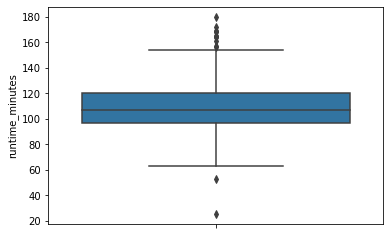

In [40]:
sns.boxplot(y='runtime_minutes',data=competing_studio_budgets_ratings_df);

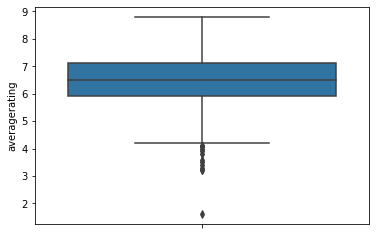

In [41]:
sns.boxplot(y='averagerating',data=competing_studio_budgets_ratings_df);

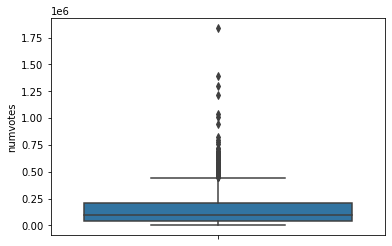

In [42]:
sns.boxplot(y='numvotes',data=competing_studio_budgets_ratings_df);

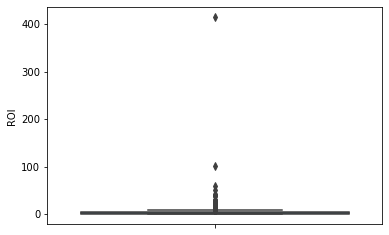

In [43]:
sns.boxplot(y='ROI',data=competing_studio_budgets_ratings_df);

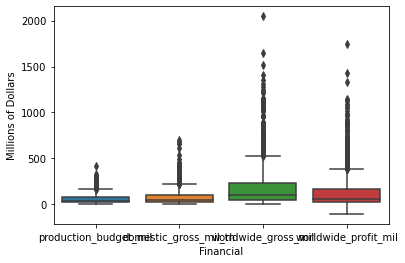

In [44]:
boxplot_df = pd.melt(competing_studio_budgets_ratings_df[['production_budget_mil', 'domestic_gross_mil_tn', 'worldwide_gross_mil', 'worldwide_profit_mil']])
sns.boxplot(x='variable', y='value',data=boxplot_df)
plt.xlabel('Financial')
plt.ylabel('Millions of Dollars');

## Analysis

### How does production budget affect outcomes?
- Consider producing higher budget films: It appears that higher budget films have higher profits and higher popularity

In [45]:
competing_studio_budgets_ratings_df.columns

Index(['title', 'studio', 'domestic_gross_bom', 'foreign_gross', 'year',
       'foreign_gross_mil', 'domestic_gross_mil_bom',
       'bom_worldwide_gross_mil', 'id', 'release_date', 'movie',
       'production_budget', 'domestic_gross_tn', 'worldwide_gross',
       'production_budget_mil', 'domestic_gross_mil_tn', 'worldwide_gross_mil',
       'worldwide_profit_mil', 'ROI', 'movie_id', 'primary_title',
       'original_title', 'start_year', 'runtime_minutes', 'genres',
       'averagerating', 'numvotes', 'popularity'],
      dtype='object')

#### Correlations with Production Budget
- worldwide_profit_mil: strong positive correlation
- ROI: no correlation
- averagerating: weak positive correlation
- numvotes: moderate positive correlation

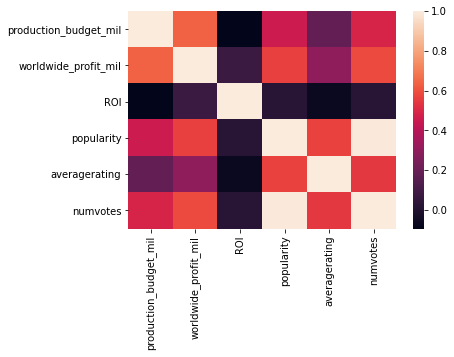

In [46]:
corr_budgets_ratings = competing_studio_budgets_ratings_df[['production_budget_mil', 'worldwide_profit_mil', 
                                                            'ROI', 'popularity', 'averagerating', 'numvotes']].corr()
sns.heatmap(corr_budgets_ratings);

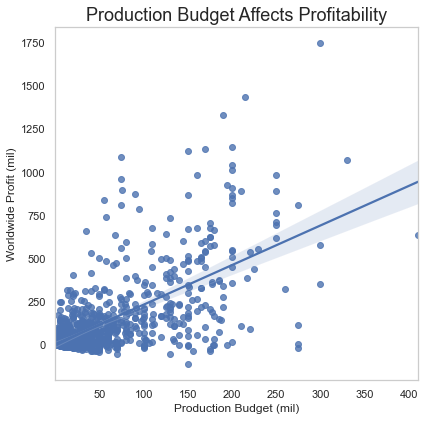

In [133]:
fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.regplot(x='production_budget_mil', y='worldwide_profit_mil', 
                data=competing_studio_budgets_ratings_df, ax=ax)
ax.set_title('Production Budget Affects Profitability')
ax.set_xlabel('Production Budget (mil)')
ax.set_ylabel('Worldwide Profit (mil)')
ax.ticklabel_format(style='plain')
ax.grid(b=False);

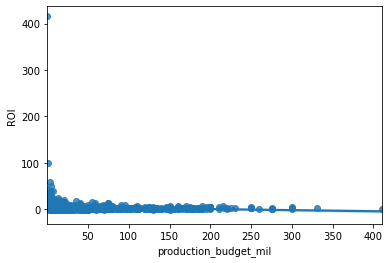

In [48]:
sns.regplot(x='production_budget_mil', y='ROI', data=competing_studio_budgets_ratings_df);

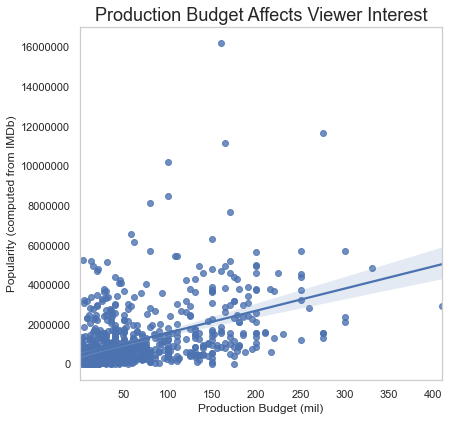

In [131]:

fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.regplot(x='production_budget_mil', y='popularity', 
                data=competing_studio_budgets_ratings_df, ax=ax)
ax.set_title('Production Budget Affects Viewer Interest')
ax.set_xlabel('Production Budget (mil)')
ax.set_ylabel('Popularity (computed from IMDb)')
ax.ticklabel_format(style='plain')
ax.grid(b=False);

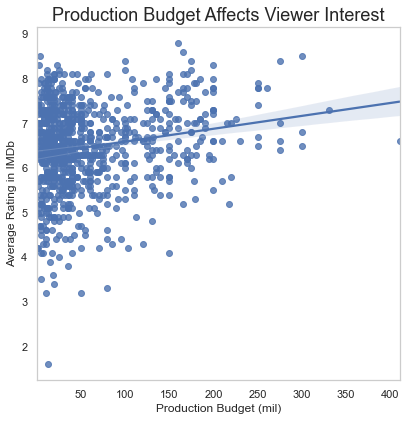

In [129]:
fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.regplot(x='production_budget_mil', y='averagerating', 
                data=competing_studio_budgets_ratings_df, ax=ax)
ax.set_title('Production Budget Affects Viewer Interest')
ax.set_xlabel('Production Budget (mil)')
ax.set_ylabel('Average Rating in IMDb')
ax.ticklabel_format(style='plain')
ax.grid(b=False);

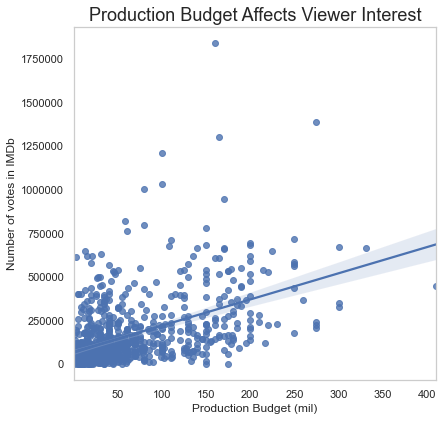

In [128]:
fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.regplot(x='production_budget_mil', y='numvotes', 
                data=competing_studio_budgets_ratings_df, ax=ax)
ax.set_title('Production Budget Affects Viewer Interest')
ax.set_xlabel('Production Budget (mil)')
ax.set_ylabel('Number of votes in IMDb')
ax.ticklabel_format(style='plain')
ax.grid(b=False);

#### It doesn't look like correlations with Production Budget change when
- we exclude abnormally high ROI movies

In [52]:
filt = (competing_studio_budgets_ratings_df['ROI'] < 25)
clean_competing_studio_budgets_ratings_df = competing_studio_budgets_ratings_df[filt]

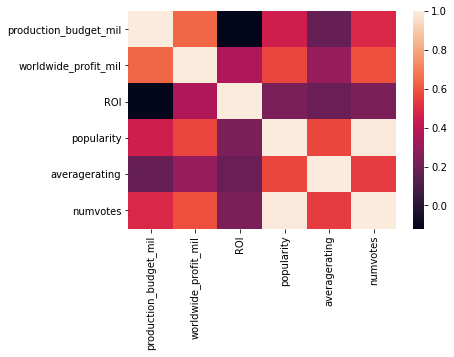

In [53]:
corr_budgets_ratings = clean_competing_studio_budgets_ratings_df[['production_budget_mil', 'worldwide_profit_mil', 
                                                            'ROI', 'popularity', 'averagerating', 'numvotes']].corr()
sns.heatmap(corr_budgets_ratings);

#### It doesn't look like correlations with Production Budget change when
- we exclude low budget movies

In [54]:
filt = (competing_studio_budgets_ratings_df['production_budget_mil'] > 25)
clean_competing_studio_budgets_ratings_df = competing_studio_budgets_ratings_df[filt]

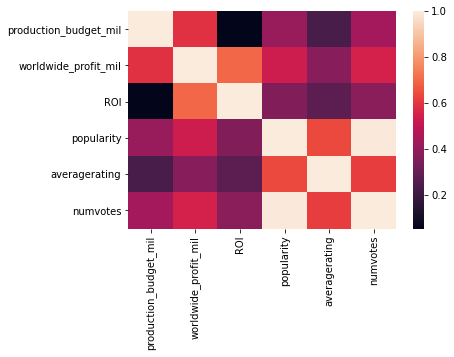

In [55]:
corr_budgets_ratings = clean_competing_studio_budgets_ratings_df[['production_budget_mil', 'worldwide_profit_mil', 
                                                            'ROI', 'popularity', 'averagerating', 'numvotes']].corr()
sns.heatmap(corr_budgets_ratings);

## How does movie genre affect outcomes?
- ROI is highest for Documentary, Horror, Mystery, and Thriller
- Interest (numratings, popularity) is highest for Western, Sci-Fi, Adventure, Action
- Average worldwide profit is highest for Animation, Sci-Fi, Adventure, Action

In [56]:
set_of_genres = set()
for movie_row in competing_studio_budgets_ratings_df['genres'].dropna():
    set_of_genres.update(movie_row.split(','))

list_of_genres = list(set_of_genres)
list_of_genres

['Music',
 'Family',
 'Crime',
 'Fantasy',
 'Western',
 'Sci-Fi',
 'Comedy',
 'Drama',
 'Biography',
 'History',
 'War',
 'Musical',
 'Sport',
 'Thriller',
 'Mystery',
 'Romance',
 'Animation',
 'Horror',
 'Action',
 'Documentary',
 'Adventure']

In [57]:
tmp_df_columns = list(competing_studio_budgets_ratings_df.columns)
tmp_df_columns.append('genre')
tmp_df = pd.DataFrame(columns=tmp_df_columns)


for genre in list_of_genres:
    filt = competing_studio_budgets_ratings_df['genres'].str.contains(genre, na=False)
    filt_df = competing_studio_budgets_ratings_df[filt]
    filt_df['genre'] = genre
    tmp_df = pd.concat([tmp_df, filt_df])


<ipython-input-57-f705b6bc83a4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df['genre'] = genre


In [58]:
long_competing_studio_budgets_ratings_df = tmp_df

In [59]:
competing_studio_budgets_ratings_by_genre_df = long_competing_studio_budgets_ratings_df.groupby('genre')[['production_budget_mil', 'worldwide_profit_mil', 'ROI', 'popularity', 'averagerating', 'numvotes']].mean()
competing_studio_budgets_ratings_by_genre_df

,production_budget_mil,worldwide_profit_mil,ROI,popularity,averagerating,numvotes
genre,,,,,,
Action,95.87,209.65,2.04,1595892.43,6.50,227966.17
Adventure,117.04,283.84,2.41,1662252.54,6.54,232889.14
Animation,107.14,322.90,3.09,1042682.96,6.64,142968.53
Biography,30.74,77.16,3.01,1137076.83,7.14,149243.23
Comedy,49.88,128.28,2.81,807037.28,6.30,117597.48
Crime,39.63,78.04,1.79,1121101.68,6.62,158242.57
Documentary,24.30,60.09,5.95,113290.43,6.31,23039.29
Drama,35.41,69.20,2.94,1013038.25,6.75,138949.82
Family,72.01,115.53,1.84,581242.40,6.08,85708.72


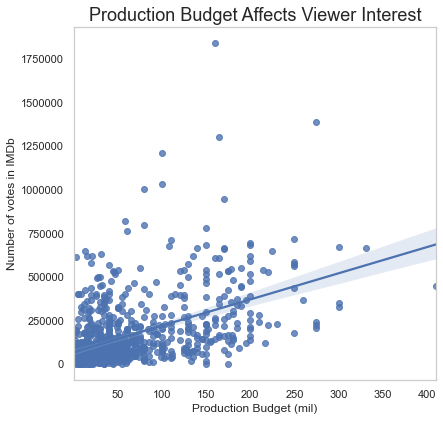

In [134]:
fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.regplot(x='production_budget_mil', y='numvotes', 
                data=competing_studio_budgets_ratings_df, ax=ax)
ax.set_title('Production Budget Affects Viewer Interest')
ax.set_xlabel('Production Budget (mil)')
ax.set_ylabel('Number of votes in IMDb')
ax.ticklabel_format(style='plain')
ax.grid(b=False);

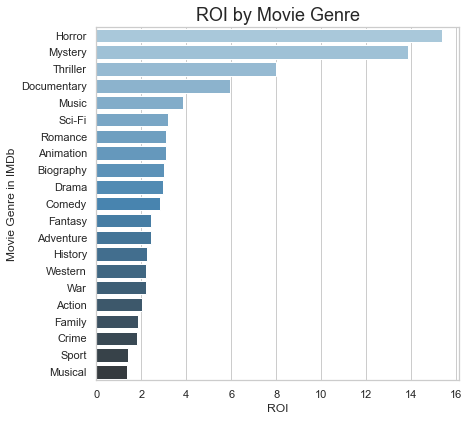

In [141]:
tmp = competing_studio_budgets_ratings_by_genre_df.sort_values('ROI', ascending=False)['ROI']

fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.barplot(y=tmp.index, 
            x=tmp.values,
            palette="Blues_d")
ax.set_title('ROI by Movie Genre')
ax.set_xlabel('ROI')
ax.set_ylabel('Movie Genre in IMDb');

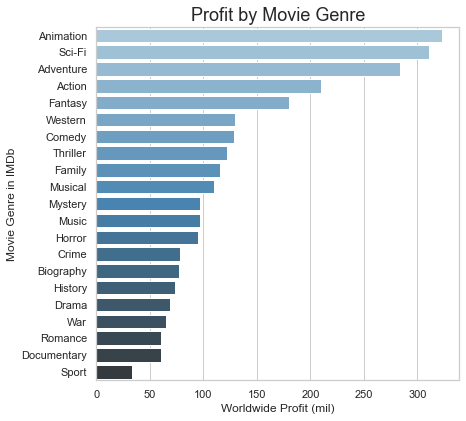

In [142]:
tmp = competing_studio_budgets_ratings_by_genre_df.sort_values('worldwide_profit_mil', ascending=False)['worldwide_profit_mil']

fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.barplot(y=tmp.index, 
            x=tmp.values,
            palette="Blues_d")
ax.set_title('Profit by Movie Genre')
ax.set_xlabel('Worldwide Profit (mil)')
ax.set_ylabel('Movie Genre in IMDb');

#sns.barplot(y=competing_studio_budgets_ratings_by_genre_df.index, 
#            x=competing_studio_budgets_ratings_by_genre_df['worldwide_profit_mil'],
#            color = 'cyan');

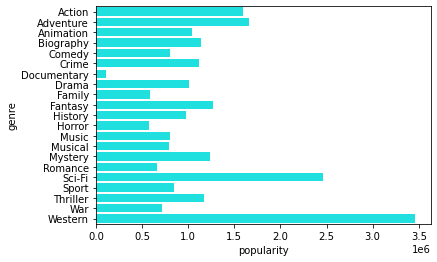

In [62]:
sns.barplot(y=competing_studio_budgets_ratings_by_genre_df.index, 
            x=competing_studio_budgets_ratings_by_genre_df['popularity'],
            color = 'cyan');

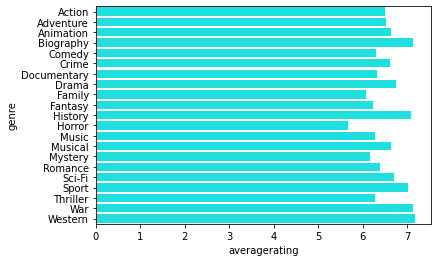

In [63]:
sns.barplot(y=competing_studio_budgets_ratings_by_genre_df.index, 
            x=competing_studio_budgets_ratings_by_genre_df['averagerating'],
            color = 'cyan');

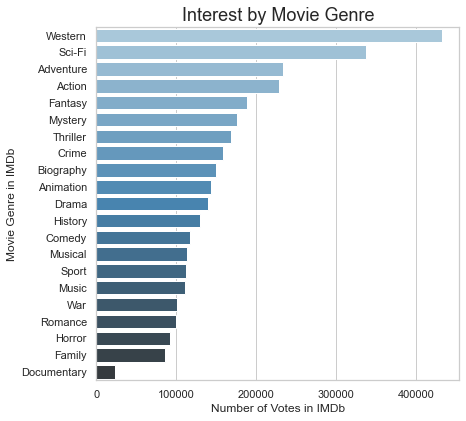

In [143]:
tmp = competing_studio_budgets_ratings_by_genre_df.sort_values('numvotes', ascending=False)['numvotes']

fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.barplot(y=tmp.index, 
            x=tmp.values,
            palette="Blues_d")
ax.set_title('Interest by Movie Genre')
ax.set_xlabel('Number of Votes in IMDb')
ax.set_ylabel('Movie Genre in IMDb');


#sns.barplot(y=competing_studio_budgets_ratings_by_genre_df.index, 
#            x=competing_studio_budgets_ratings_by_genre_df['numvotes'],
#            color = 'cyan');

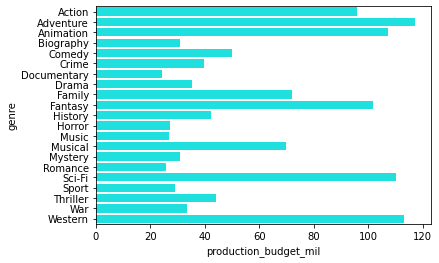

In [65]:
sns.barplot(y=competing_studio_budgets_ratings_by_genre_df.index, 
            x=competing_studio_budgets_ratings_by_genre_df['production_budget_mil'],
            color = 'cyan');

In [66]:
for col in competing_studio_budgets_ratings_by_genre_df.columns:
    sorted_df = competing_studio_budgets_ratings_by_genre_df.sort_values(col, ascending=False)
    print(sorted_df[col].head(4))
    print()

genre
Adventure   117.04
Western     113.00
Sci-Fi      110.02
Animation   107.14
Name: production_budget_mil, dtype: float64

genre
Animation   322.90
Sci-Fi      310.60
Adventure   283.84
Action      209.65
Name: worldwide_profit_mil, dtype: float64

genre
Horror        15.37
Mystery       13.84
Thriller       7.99
Documentary    5.95
Name: ROI, dtype: float64

genre
Western     3455965.12
Sci-Fi      2458482.28
Adventure   1662252.54
Action      1595892.43
Name: popularity, dtype: float64

genre
Western     7.17
Biography   7.14
War         7.12
History     7.10
Name: averagerating, dtype: float64

genre
Western     432134.25
Sci-Fi      337778.01
Adventure   232889.14
Action      227966.17
Name: numvotes, dtype: float64



## How do movie directors affect outcomes?


In [67]:
#competing_studio_budgets_ratings_df[['production_budget_mil', 'worldwide_profit_mil', 'ROI', 'popularity', 'averagerating', 'numvotes']]

In [68]:
top_50_worldwide_profit_df = competing_studio_budgets_ratings_df.sort_values('worldwide_profit_mil', ascending=False).head(50)
top_50_ROI_df = competing_studio_budgets_ratings_df.sort_values('ROI', ascending=False).head(50)
top_50_popularity_df = competing_studio_budgets_ratings_df.sort_values('popularity', ascending=False).head(50)

In [69]:
imdb_principals_df.columns

Index(['movie_id', 'ordering', 'person_id', 'category', 'job', 'characters',
       'primary_name', 'birth_year', 'death_year', 'primary_profession',
       'primary_title', 'original_title', 'start_year', 'runtime_minutes',
       'genres', 'averagerating', 'numvotes'],
      dtype='object')

In [70]:
top_50_worldwide_profit_df.columns

Index(['title', 'studio', 'domestic_gross_bom', 'foreign_gross', 'year',
       'foreign_gross_mil', 'domestic_gross_mil_bom',
       'bom_worldwide_gross_mil', 'id', 'release_date', 'movie',
       'production_budget', 'domestic_gross_tn', 'worldwide_gross',
       'production_budget_mil', 'domestic_gross_mil_tn', 'worldwide_gross_mil',
       'worldwide_profit_mil', 'ROI', 'movie_id', 'primary_title',
       'original_title', 'start_year', 'runtime_minutes', 'genres',
       'averagerating', 'numvotes', 'popularity'],
      dtype='object')

In [71]:
principals_top_50_worldwide_profit_df = imdb_principals_df.merge(top_50_worldwide_profit_df, on='movie_id', how='inner')
principals_top_50_worldwide_profit_df

,movie_id,ordering,person_id,category,job,characters,primary_name,birth_year,death_year,primary_profession,...,worldwide_profit_mil,ROI,primary_title_y,original_title_y,start_year_y,runtime_minutes_y,genres_y,averagerating_y,numvotes_y,popularity
0,tt2015381,10,nm0317493,writer,character created by: Rocket Raccoon,None,Keith Giffen,1952.00,nan,"writer,animation_department,art_department",...,600.87,3.53,Guardians of the Galaxy,Guardians of the Galaxy,2014,121.00,"Action,Adventure,Comedy",8.10,948394.00,7681991.40
1,tt2015381,1,nm0695435,actor,None,"[""Peter Quill""]",Chris Pratt,1979.00,nan,"actor,soundtrack,producer",...,600.87,3.53,Guardians of the Galaxy,Guardians of the Galaxy,2014,121.00,"Action,Adventure,Comedy",8.10,948394.00,7681991.40
2,tt2015381,2,nm0004874,actor,None,"[""Groot""]",Vin Diesel,1967.00,nan,"producer,actor,director",...,600.87,3.53,Guardians of the Galaxy,Guardians of the Galaxy,2014,121.00,"Action,Adventure,Comedy",8.10,948394.00,7681991.40
3,tt2015381,3,nm0177896,actor,None,"[""Rocket""]",Bradley Cooper,1975.00,nan,"actor,producer,soundtrack",...,600.87,3.53,Guardians of the Galaxy,Guardians of the Galaxy,2014,121.00,"Action,Adventure,Comedy",8.10,948394.00,7681991.40
4,tt2015381,4,nm0757855,actress,None,"[""Gamora""]",Zoe Saldana,1978.00,nan,"actress,producer,writer",...,600.87,3.53,Guardians of the Galaxy,Guardians of the Galaxy,2014,121.00,"Action,Adventure,Comedy",8.10,948394.00,7681991.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,tt7002100,5,nm9061888,composer,None,None,Steve Riven,nan,nan,composer,...,623.01,3.56,Coco,Coco,2017,98.00,Horror,7.40,35.00,259.00
495,tt7002100,6,nm9061885,actor,None,"[""Charli""]",Gonzalo Moreno,nan,nan,actor,...,623.01,3.56,Coco,Coco,2017,98.00,Horror,7.40,35.00,259.00
496,tt7002100,7,nm9061887,actor,None,"[""Coco""]",Leolo Moulin,nan,nan,"actor,writer",...,623.01,3.56,Coco,Coco,2017,98.00,Horror,7.40,35.00,259.00
497,tt7002100,8,nm9061882,actress,None,"[""Alma""]",Lucy Rodriguez Sandoval,nan,nan,actress,...,623.01,3.56,Coco,Coco,2017,98.00,Horror,7.40,35.00,259.00


In [72]:
# Let's make an empty set to save the best directors (cast to list later)
director_set = set()

In [73]:
filt = (principals_top_50_worldwide_profit_df['category'] == 'director')
principals_top_50_worldwide_profit_df[filt]

,movie_id,ordering,person_id,category,job,characters,primary_name,birth_year,death_year,primary_profession,...,worldwide_profit_mil,ROI,primary_title_y,original_title_y,start_year_y,runtime_minutes_y,genres_y,averagerating_y,numvotes_y,popularity
5,tt2015381,5,nm0348181,director,None,None,James Gunn,1966.00,nan,"writer,producer,director",...,600.87,3.53,Guardians of the Galaxy,Guardians of the Galaxy,2014,121.00,"Action,Adventure,Comedy",8.10,948394.00,7681991.40
15,tt2096673,5,nm0230032,director,None,None,Pete Docter,1968.00,nan,"writer,producer,director",...,679.24,3.88,Inside Out,Inside Out,2015,95.00,"Adventure,Animation,Comedy",8.20,536181.00,4396684.20
16,tt2096673,6,nm0215455,director,co-director,None,Ronnie Del Carmen,1959.00,nan,"art_department,animation_department,miscellaneous",...,679.24,3.88,Inside Out,Inside Out,2015,95.00,"Adventure,Animation,Comedy",8.20,536181.00,4396684.20
25,tt2109248,5,nm0000881,director,None,None,Michael Bay,1965.00,nan,"producer,director,actor",...,894.04,4.26,Transformers: Age of Extinction,Transformers: Age of Extinction,2014,165.00,"Action,Adventure,Sci-Fi",5.70,283486.00,1615870.20
35,tt0369610,5,nm1119880,director,None,None,Colin Trevorrow,1976.00,nan,"writer,producer,director",...,1433.85,6.67,Jurassic World,Jurassic World,2015,124.00,"Action,Adventure,Sci-Fi",7.00,539338.00,3775366.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,tt3748528,5,nm2284484,director,None,None,Gareth Edwards,1975.00,nan,"visual_effects,director,writer",...,849.10,4.25,Rogue One: A Star Wars Story,Rogue One,2016,133.00,"Action,Adventure,Sci-Fi",7.80,478592.00,3733017.60
455,tt2820852,5,nm1490123,director,None,None,James Wan,1977.00,nan,"producer,writer,director",...,1328.72,6.99,Furious 7,Furious Seven,2015,137.00,"Action,Crime,Thriller",7.20,335074.00,2412532.80
465,tt4881806,5,nm1291105,director,None,None,J.A. Bayona,1975.00,nan,"director,writer,actor",...,1135.77,6.68,Jurassic World: Fallen Kingdom,Jurassic World: Fallen Kingdom,2018,128.00,"Action,Adventure,Sci-Fi",6.20,219125.00,1358575.00
475,tt4630562,5,nm0336620,director,None,None,F. Gary Gray,1969.00,nan,"director,actor,producer",...,984.85,3.94,The Fate of the Furious,The Fate of the Furious,2017,136.00,"Action,Crime,Thriller",6.70,179774.00,1204485.80


In [76]:
sorted_df = principals_top_50_worldwide_profit_df[filt].sort_values('worldwide_profit_mil', ascending=False)
director_set.update(sorted_df.head(10)['primary_name'])
sorted_df.head(10)[['primary_name', 'primary_title_x', 'genres_y', 'worldwide_profit_mil']]

,primary_name,primary_title_x,genres_y,worldwide_profit_mil
436,Joe Russo,Avengers: Infinity War,"Action,Adventure,Sci-Fi",1748.13
435,Anthony Russo,Avengers: Infinity War,"Action,Adventure,Sci-Fi",1748.13
35,Colin Trevorrow,Jurassic World,"Action,Adventure,Sci-Fi",1433.85
455,James Wan,Furious 7,"Action,Crime,Thriller",1328.72
85,Ryan Coogler,Black Panther,"Action,Adventure,Sci-Fi",1148.26
465,J.A. Bayona,Jurassic World: Fallen Kingdom,"Action,Adventure,Sci-Fi",1135.77
175,Chris Buck,Frozen,"Adventure,Animation,Comedy",1122.47
176,Jennifer Lee,Frozen,"Adventure,Animation,Comedy",1122.47
245,Kyle Balda,Minions,"Adventure,Animation,Comedy",1086.34
375,Joss Whedon,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",1072.41


In [77]:
print(director_set)

{'Colin Trevorrow', 'Kyle Balda', 'Joss Whedon', 'Jennifer Lee', 'Joe Russo', 'Ryan Coogler', 'Anthony Russo', 'J.A. Bayona', 'Chris Buck', 'James Wan'}


In [78]:
principals_top_50_ROI_df = imdb_principals_df.merge(top_50_ROI_df, on='movie_id', how='inner')
filt = principals_top_50_ROI_df['category'] == 'director'
sorted_df = principals_top_50_ROI_df[filt].sort_values('ROI', ascending=False)
director_set.update(sorted_df.head(10)['primary_name'])
sorted_df.head(10)[['primary_name', 'primary_title_x', 'genres_y', 'ROI']]

,primary_name,primary_title_x,genres_y,ROI
234,Chris Lofing,The Gallows,"Horror,Mystery,Thriller",415.56
233,Travis Cluff,The Gallows,"Horror,Mystery,Thriller",415.56
5,William Brent Bell,The Devil Inside,Horror,100.76
203,Tod Williams,Paranormal Activity 2,Horror,58.17
413,Jordan Peele,Get Out,"Horror,Mystery,Thriller",50.07
114,Bradley Parker,Chernobyl Diaries,"Horror,Mystery,Thriller",41.41
36,Ariel Schulman,Paranormal Activity 3,"Horror,Mystery,Thriller",40.41
35,Henry Joost,Paranormal Activity 3,"Horror,Mystery,Thriller",40.41
283,John R. Leonetti,Annabelle,"Horror,Mystery,Thriller",38.52
253,Daniel Stamm,The Last Exorcism,"Drama,Horror,Thriller",37.98


In [79]:
print(director_set)

{'Daniel Stamm', 'Jennifer Lee', 'J.A. Bayona', 'James Wan', 'Colin Trevorrow', 'Joss Whedon', 'Joe Russo', 'Bradley Parker', 'Tod Williams', 'Chris Buck', 'Kyle Balda', 'Travis Cluff', 'Anthony Russo', 'William Brent Bell', 'John R. Leonetti', 'Henry Joost', 'Jordan Peele', 'Ariel Schulman', 'Ryan Coogler', 'Chris Lofing'}


In [80]:
principals_top_50_popularity_df = imdb_principals_df.merge(top_50_popularity_df, on='movie_id', how='inner')
filt = principals_top_50_popularity_df['category'] == 'director'
sorted_df = principals_top_50_popularity_df[filt].sort_values('popularity', ascending=False)
director_set.update(sorted_df.head(10)['primary_name'])
sorted_df.head(10)[['primary_name', 'primary_title_x', 'genres_y', 'popularity']]

,primary_name,primary_title_x,genres_y,popularity
315,Christopher Nolan,Inception,"Action,Adventure,Sci-Fi",16201380.80
355,Christopher Nolan,The Dark Knight Rises,"Action,Thriller",11657259.60
405,Christopher Nolan,Interstellar,"Adventure,Drama,Sci-Fi",11174272.40
175,Quentin Tarantino,Django Unchained,"Drama,Western",10175802.00
225,Martin Scorsese,The Wolf of Wall Street,"Biography,Crime,Drama",8489935.60
145,Martin Scorsese,Shutter Island,"Mystery,Thriller",8148276.00
15,James Gunn,Guardians of the Galaxy,"Action,Adventure,Comedy",7681991.40
195,Tim Miller,Deadpool,"Action,Adventure,Comedy",6566776.00
155,George Miller,Mad Max: Fury Road,"Action,Adventure,Sci-Fi",6325371.00
425,David Fincher,Gone Girl,"Drama,Mystery,Thriller",6168895.20


#### Since we're suggesting certain genres, let's pick directors that make good movies in that genre
- Limit directors to our suggested genres
    - Add suggested genres to filt variable to narrow down to 
- horizontal bar graph
    - names of directors and how much profit they made

In [81]:
suggested_genre_list = ['Animation', 'Sci-Fi', 'Adventure', 'Action', 'Western', 'Documentary', 'Horror', 'Mystery', 'Thriller']

In [83]:
director_list = list(director_set)
director_list

['Daniel Stamm',
 'Jennifer Lee',
 'Martin Scorsese',
 'David Fincher',
 'George Miller',
 'J.A. Bayona',
 'James Gunn',
 'James Wan',
 'Colin Trevorrow',
 'Joss Whedon',
 'Joe Russo',
 'Bradley Parker',
 'Christopher Nolan',
 'Tod Williams',
 'Chris Buck',
 'Kyle Balda',
 'Travis Cluff',
 'Anthony Russo',
 'William Brent Bell',
 'John R. Leonetti',
 'Tim Miller',
 'Henry Joost',
 'Quentin Tarantino',
 'Jordan Peele',
 'Ariel Schulman',
 'Ryan Coogler',
 'Chris Lofing']

In [156]:
#competing_studio_budgets_ratings_df['primary_name'].isin(director_list)
filt = imdb_principals_df['category'] == 'director'
directors_movies_df = imdb_principals_df[filt].merge(competing_studio_budgets_ratings_df, on='movie_id', how='inner')
filt = directors_movies_df['primary_name'].isin(director_list)
best_directors = directors_movies_df[filt]
#best_directors
filt = directors_movies_df['primary_name'].isin(['Martin Scorsese', 'David Fincher', 'Joe Russo'])
recommended_directors =  directors_movies_df[filt]
recommended_directors

,movie_id,ordering,person_id,category,job,characters,primary_name,birth_year,death_year,primary_profession,...,worldwide_profit_mil,ROI,primary_title_y,original_title_y,start_year_y,runtime_minutes_y,genres_y,averagerating_y,numvotes_y,popularity
104,tt0970179,5,nm0000217,director,None,None,Martin Scorsese,1942.00,nan,"producer,director,actor",...,0.05,0.00,Hugo,Hugo,2011,126.00,"Adventure,Drama,Family",7.50,284869.00,2136517.50
152,tt1843866,6,nm0751648,director,None,None,Joe Russo,1971.00,nan,"producer,director,writer",...,544.40,3.20,Captain America: The Winter Soldier,Captain America: The Winter Soldier,2014,136.00,"Action,Adventure,Sci-Fi",7.80,666252.00,5196765.60
219,tt1285016,5,nm0000399,director,None,None,David Fincher,1962.00,nan,"director,producer,actor",...,184.92,4.62,The Social Network,The Social Network,2010,120.00,"Biography,Drama",7.70,568578.00,4378050.60
315,tt1130884,5,nm0000217,director,None,None,Martin Scorsese,1942.00,nan,"producer,director,actor",...,219.46,2.74,Shutter Island,Shutter Island,2010,138.00,"Mystery,Thriller",8.10,1005960.00,8148276.00
426,tt0993846,5,nm0000217,director,None,None,Martin Scorsese,1942.00,nan,"producer,director,actor",...,289.87,2.90,The Wolf of Wall Street,The Wolf of Wall Street,2013,180.00,"Biography,Crime,Drama",8.20,1035358.00,8489935.60
679,tt2267998,5,nm0000399,director,None,None,David Fincher,1962.00,nan,"director,producer,actor",...,307.57,5.04,Gone Girl,Gone Girl,2014,149.00,"Drama,Mystery,Thriller",8.10,761592.00,6168895.20
751,tt3498820,6,nm0751648,director,None,None,Joe Russo,1971.00,nan,"producer,director,writer",...,890.07,3.56,Captain America: Civil War,Captain America: Civil War,2016,147.00,"Action,Adventure,Sci-Fi",7.80,583507.00,4551354.60
803,tt4154756,6,nm0751648,director,None,None,Joe Russo,1971.00,nan,"producer,director,writer",...,1748.13,5.83,Avengers: Infinity War,Avengers: Infinity War,2018,149.00,"Action,Adventure,Sci-Fi",8.50,670926.00,5702871.00


In [93]:
# Make mean outcomes grouped by director name
grouped_best_directors = best_directors.groupby('primary_name')[['worldwide_profit_mil', 'ROI', 'popularity', 'averagerating_y', 'numvotes_y']].mean()

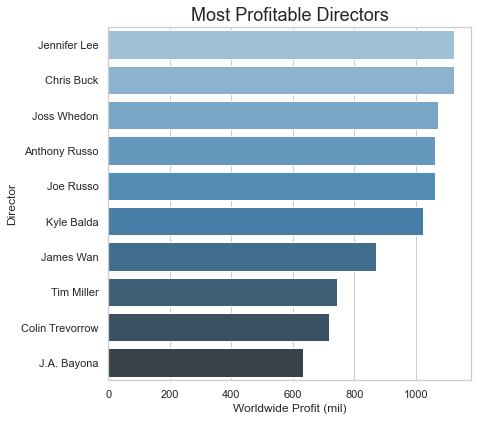

In [147]:
tmp = grouped_best_directors.sort_values('worldwide_profit_mil', ascending=False)['worldwide_profit_mil'].head(10)

fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.barplot(y=tmp.index, 
            x=tmp.values,
            palette="Blues_d")
ax.set_title('Most Profitable Directors')
ax.set_xlabel('Worldwide Profit (mil)')
ax.set_ylabel('Director');


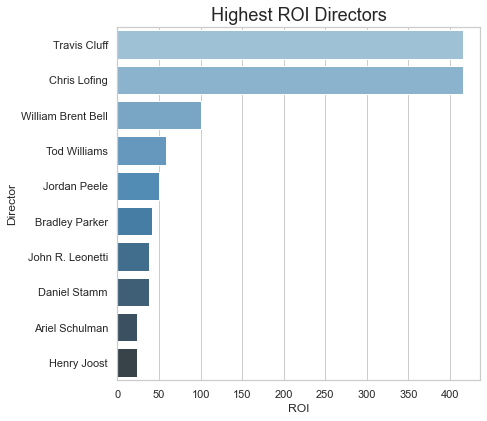

In [148]:
tmp = grouped_best_directors.sort_values('ROI', ascending=False)['ROI'].head(10)

fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.barplot(y=tmp.index, 
            x=tmp.values,
            palette="Blues_d")
ax.set_title('Highest ROI Directors')
ax.set_xlabel('ROI')
ax.set_ylabel('Director');


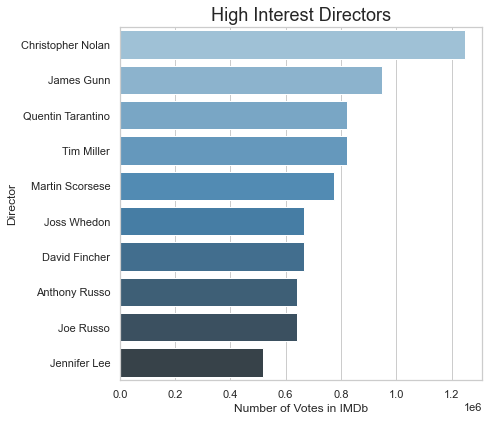

In [152]:
tmp = grouped_best_directors.sort_values('numvotes_y', ascending=False)['numvotes_y'].head(10)

fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.barplot(y=tmp.index, 
            x=tmp.values,
            palette="Blues_d")
ax.set_title('High Interest Directors')
ax.set_xlabel('Number of Votes in IMDb')
ax.set_ylabel('Director');
#ax.ticklabel_format(scilimits=(0,1000000))
#ax.ticklabel_format(style='plain');

## Conclusions

## Next Steps